In [1]:
#!/usr/bin/env python
"""
Ways to evaluate partition function
Z_eval = 'Lap'         : Laplace approximation (default)
         'Lap+Sam[+P]' : Laplace approximation + importance sampling
         'GLap[+P]'    : generalized Laplace approximation
         'GLap+Sam[+P]': generalized Laplace approximation + importance sampling
         'Lap+Fey'     : Laplace approximation + Feynman diagrams

Methods of posterior sampling
pt_method =  None       : no sampling will be performed (default)
            'Lap[+P]'   : sampling from Laplace approximation + importance weight
            'GLap[+P]'  : sampling from generalized Laplace approximation + importance weight
            'MMC'       : sampling using Metropolis Monte Carlo

Note: [+P] means this task can be done in parallel
"""
import sys
import numpy as np
import scipy as sp
import pickle
import matplotlib.pyplot as plt
sys.path.append('../code/')
import deft_core
import utils
TINY_FLOAT64 = sp.finfo(sp.float64).tiny

execfile('test_header.py')

N = 100
bbox = [-15,15]
Z_eval = 'Lap'
num_Z_samples = 0
pt_method = 'Lap'
num_pt_samples = 100
fix_t_at_t_star = True
# make this pickalable
results = TestCase(N=N,
                   data_seed=0,
                   deft_seed=0,
                   G=100,
                   alpha=3,
                   bbox=bbox,
                   Z_eval=Z_eval,
                   num_Z_samples=num_Z_samples,
                   DT_MAX=1.0,
                   pt_method=pt_method,
                   num_pt_samples=num_pt_samples,
                   fix_t_at_t_star=fix_t_at_t_star
                   ).run()

t_start = -9.21
Q_end = M: geo_dist (0.09) <= resolution (0.10)
Q_end = R: log_E (-13.95) < log_E_max (10.38) - LOG_E_RANGE (20.00)
Succeeded!  t_star = -6.21
Outcome: good.
------
ERROR: geo_dists


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:182: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(M) != 2:
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/sparse/compressed.py:130: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.indices) != 1 or np.rank(self.indptr) != 1:


In [2]:
print results.results.l_star

1.81957738755


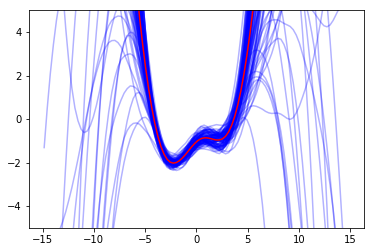

In [3]:
xs = results.results.bin_centers
phi_samples = results.results.phi_samples
phi_star = results.results.phi_star

plt.plot(xs, phi_samples, color='blue', alpha=0.3)
plt.plot(xs, phi_star, color='red')
plt.ylim(-5,5)
plt.show()

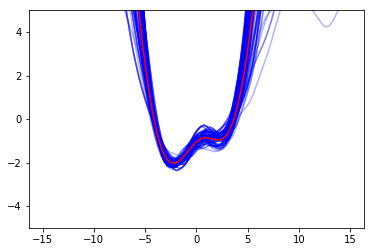

In [4]:
sample_weights = results.results.phi_weights
indices = range(num_pt_samples)
index_probs = sample_weights / sum(sample_weights)
weighted_sample_indices = np.random.choice(indices, size=num_pt_samples, p=index_probs)
phi_samples_weighted = phi_samples[:,weighted_sample_indices]

plt.plot(xs, phi_samples_weighted, color='blue', alpha=0.3)
plt.plot(xs, phi_star, color='red')
plt.ylim(-5,5)
plt.show()

In [5]:
pickle.dump(phi_samples, file('phi_samples','w'))

In [6]:
pickle.dump(phi_samples_weighted, file('phi_samples_weighted','w'))

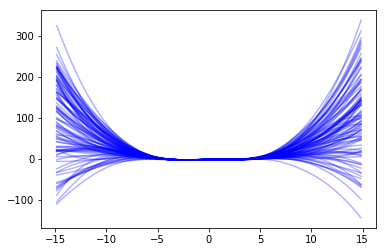

In [7]:
samples = pickle.load(file('phi_samples'))

plt.plot(xs, samples, color='blue', alpha=0.3)
plt.show()

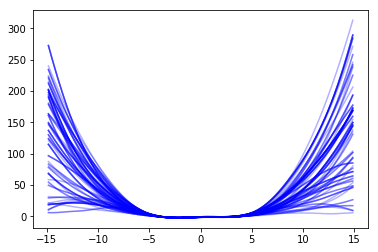

In [8]:
samples_weighted = pickle.load(file('phi_samples_weighted'))

plt.plot(xs, samples_weighted, color='blue', alpha=0.3)
plt.show()

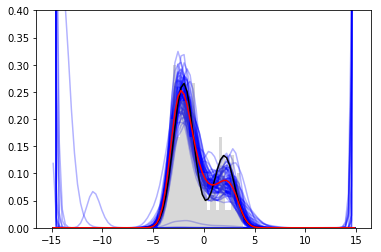

In [9]:
# Naive Laplace sampling 
xs = results.results.bin_centers
R = results.results.R
h = results.results.h
Q_true = results.Q_true
Q_star = results.results.Q_star
Q_samples = results.results.Q_samples
sample_weights = results.results.phi_weights

plt.figure(1)
plt.bar(xs, R, width=h, color='grey', alpha=0.3, zorder=2)
plt.plot(xs, Q_true, color='black', zorder=3)
plt.plot(xs, Q_star, color='red', zorder=4)
plt.plot(xs, Q_samples, color='blue', alpha=0.3, zorder=1)
plt.ylim(0, 0.4)
plt.show()

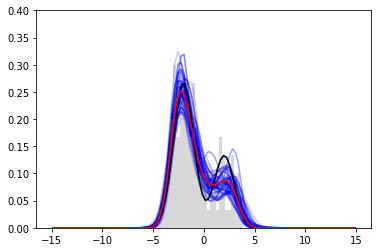

In [10]:
# Re-sampling according to importance weights
indices = range(num_pt_samples)
index_probs = sample_weights / sum(sample_weights)
weighted_sample_indices = np.random.choice(indices, size=num_pt_samples, p=index_probs)
Q_samples_weighted = Q_samples[:,weighted_sample_indices]

plt.figure(2)
plt.bar(xs, R, width=h, color='grey', alpha=0.3, zorder=2)
plt.plot(xs, Q_true, color='black', zorder=3)
plt.plot(xs, Q_star, color='red', zorder=4)
plt.plot(xs, Q_samples_weighted, color='blue', alpha=0.2, zorder=1)
plt.ylim(0, 0.4)
plt.show()

In [11]:
pickle.dump(Q_samples, file('Q_samples','w'))

In [12]:
pickle.dump(Q_samples_weighted, file('Q_samples_weighted','w'))

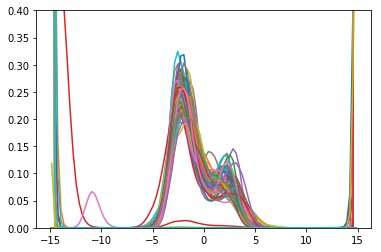

In [13]:
naive_samples = pickle.load(file('Q_samples'))

plt.plot(xs, naive_samples)
plt.ylim(0,0.4)
plt.show()

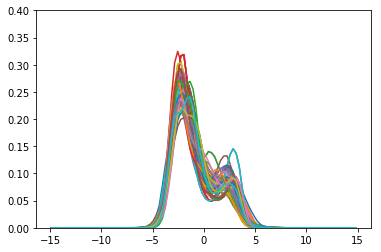

In [14]:
weighted_samples = pickle.load(file('Q_samples_weighted'))

plt.plot(xs, weighted_samples)
plt.ylim(0,0.4)
plt.show()